In [125]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/predict-the-success-of-bank-telemarketing/sample_submission.csv
/kaggle/input/predict-the-success-of-bank-telemarketing/train.csv
/kaggle/input/predict-the-success-of-bank-telemarketing/test.csv


<h3>Competetion registration code</h3>

In [126]:
#train=pd.read_csv("/kaggle/input/predict-the-success-of-bank-telemarketing/train.csv")
#print(train.shape)

In [127]:
#Y=train['target']
#X=train.iloc[:,0:15]
#print(Y)
#print(X)

In [128]:
#from sklearn.dummy import DummyClassifier
#dummy=DummyClassifier()
#dummy.fit(X,Y)

#test=pd.read_csv("/kaggle/input/predict-the-success-of-bank-telemarketing/test.csv")
#ytest=dummy.predict(test)

#submission=pd.DataFrame({"id":range(0,test.shape[0]),"target": ytest})

#submission.to_csv('submission.csv',index=False)

<h3>NECESSARY IMPORTS </h3>

In [129]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.model_selection import train_test_split,KFold,GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder
from sklearn.impute import SimpleImputer , KNNImputer
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import RidgeClassifierCV ,LogisticRegression,Perceptron,SGDClassifier
from sklearn.metrics import f1_score,classification_report,accuracy_score,roc_curve, roc_auc_score
from imblearn.over_sampling import  RandomOverSampler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC , LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB , BernoulliNB , CategoricalNB , MultinomialNB
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier , AdaBoostClassifier
from sklearn.neural_network import MLPClassifier

<h3> MILESTONE 1 </h3>

<h4>Exploratory Data Analysis</h4>

In [130]:
df = pd.read_csv("/kaggle/input/predict-the-success-of-bank-telemarketing/train.csv")
test=pd.read_csv("/kaggle/input/predict-the-success-of-bank-telemarketing/test.csv")

In [131]:
df.shape
print(df.head())
print(df.info())
print(df.describe())

  last contact date  age           job  marital  education default  balance  \
0        2009-04-17   26   blue-collar  married  secondary      no      647   
1        2009-10-11   52    technician  married  secondary      no      553   
2        2010-11-20   44   blue-collar  married  secondary      no     1397   
3        2009-09-01   33        admin.  married  secondary      no      394   
4        2008-01-29   31  entrepreneur   single   tertiary      no      137   

  housing loan    contact  duration  campaign  pdays  previous poutcome target  
0     yes   no   cellular       357         2    331         1    other     no  
1     yes   no  telephone       160         1     -1         0      NaN     no  
2      no   no   cellular       326         1     -1         0      NaN     no  
3     yes   no  telephone       104         3     -1         0      NaN     no  
4      no   no   cellular       445         2     -1         0      NaN     no  
<class 'pandas.core.frame.DataFrame'>
R



These are the columns with null values:

- **Job**
- **Education**
- **Contact**
- **Outcome**


In [132]:
for col in df.columns:
    print(df[col].value_counts())
df_save=df.copy(deep=True)

last contact date
2009-05-15    313
2008-05-15    301
2009-05-14    292
2010-05-15    292
2009-05-13    279
             ... 
2009-08-09      1
2008-08-30      1
2009-10-31      1
2009-07-26      1
2010-04-12      1
Name: count, Length: 1013, dtype: int64
age
32    1688
31    1629
33    1599
35    1571
34    1566
      ... 
18      44
92      41
87      40
85      39
95       2
Name: count, Length: 78, dtype: int64
job
blue-collar      7776
management       7462
technician       6078
admin.           4116
services         3325
self-employed    1862
retired          1824
entrepreneur     1805
unemployed       1685
housemaid        1656
student          1393
Name: count, dtype: int64
marital
married     22691
single      11250
divorced     5270
Name: count, dtype: int64
education
secondary    19584
tertiary     11615
primary       6545
Name: count, dtype: int64
default
no     36954
yes     2257
Name: count, dtype: int64
balance
0        2799
1         149
2         122
4         115
3   

<h3>Visualization</h3>

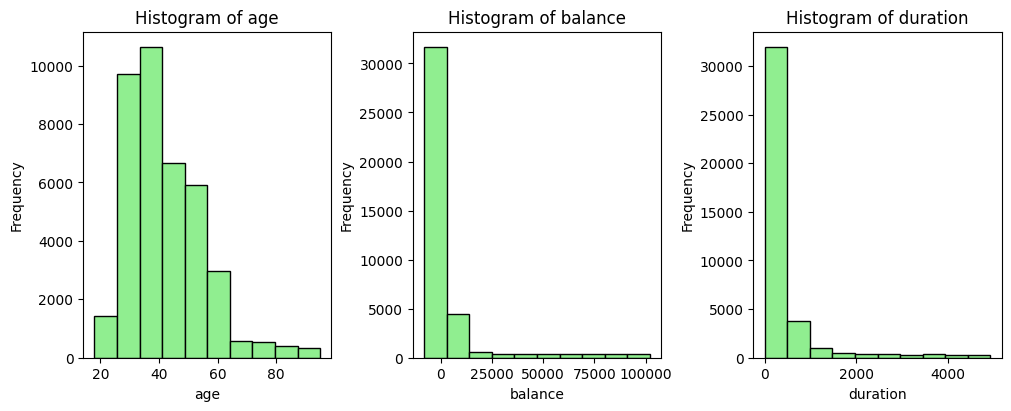

In [133]:
numeric_cols= ['age', 'balance', 'duration']
fig, axes = plt.subplots(1, len(numeric_cols), figsize=(10, 4), constrained_layout=True)
for i, col in enumerate(numeric_cols):
    axes[i].hist(df[col], color='lightgreen', edgecolor='black')
    axes[i].set_title(f'Histogram of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')
plt.show()

 <h4>Observations from the Histogram</h4>

**Most of the people in the training are around age 30 to 50 years.** <br>
**The people tend to have an average balance of around 20K, but a few have balances on the higher side, greater than 80K.**<br>
**The duration plot indicates that most calls lasted for approximately 15 minutes.**

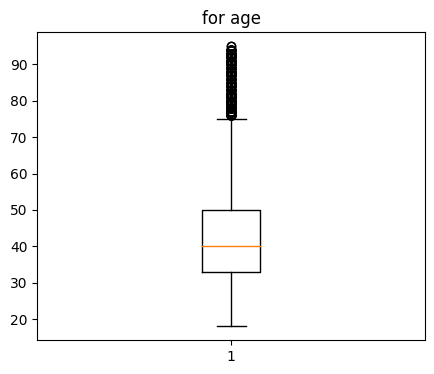

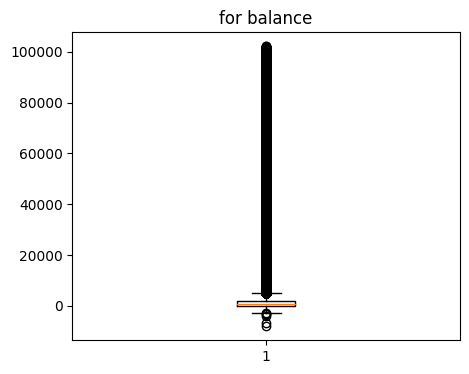

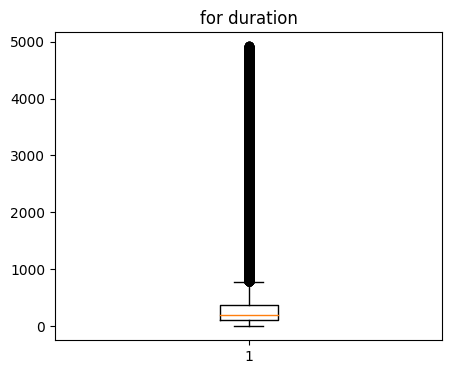

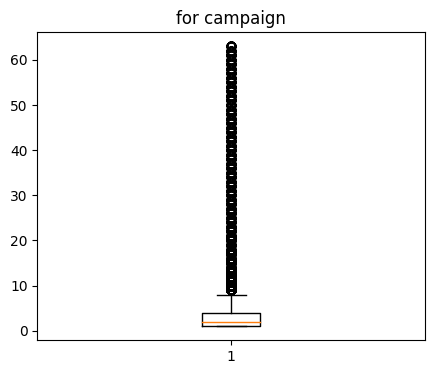

In [134]:
L=['age','balance','duration','campaign']
for col in L:
  plt.figure(figsize=(5,4))
  plt.boxplot(df[col])
  plt.title(f'for {col}')
  plt.show()
  print('\n')

**BOXPLOT overview** :
**Age has outliers but not as many as balance has. Like the balance column the
duration column also  has a range of high values making the count of outliers high** 

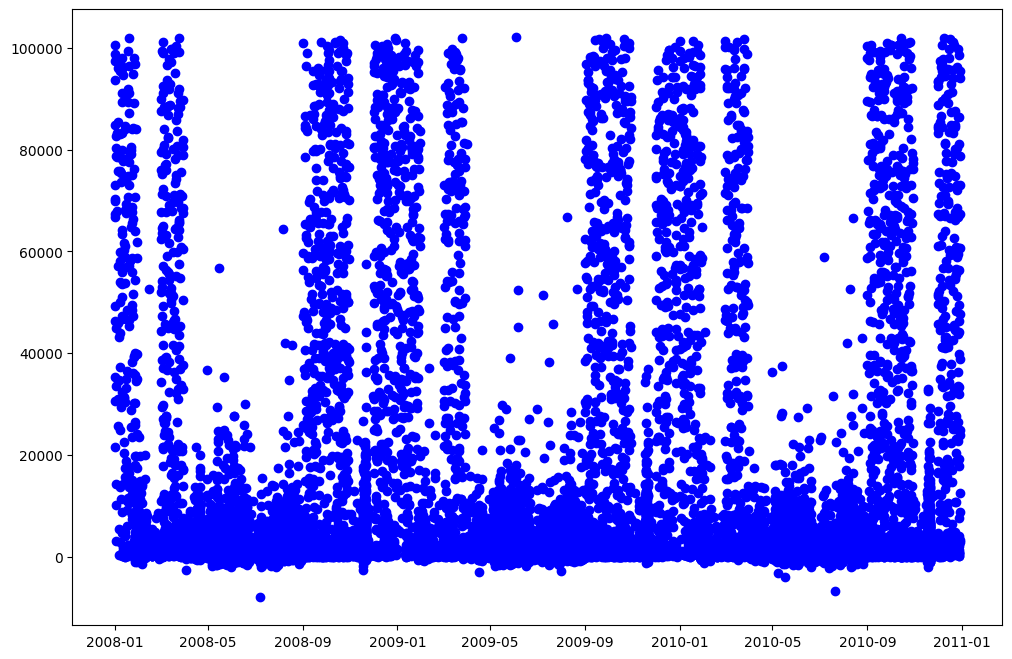

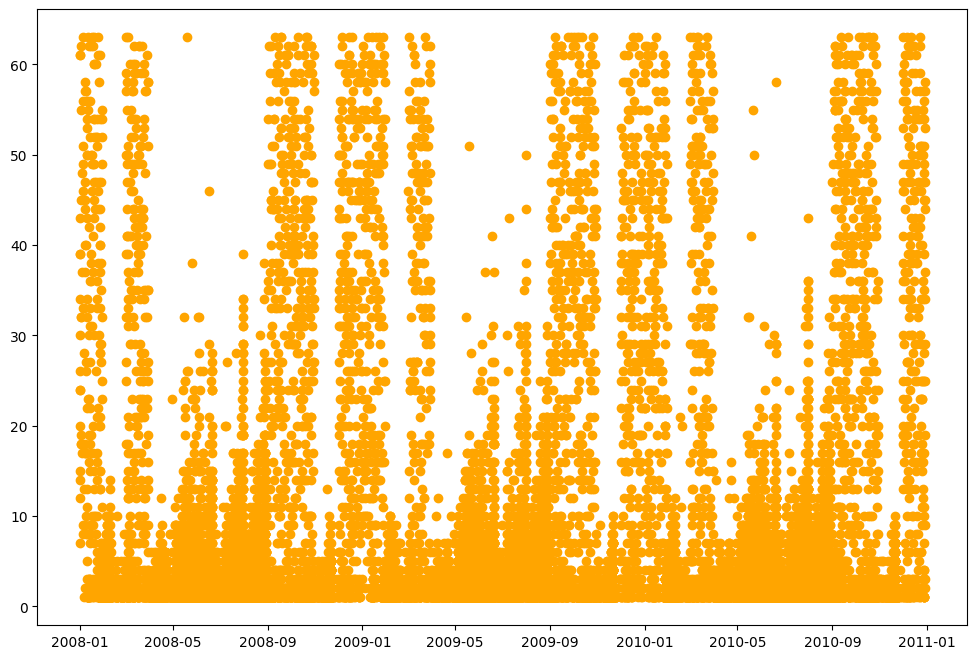

In [135]:
xx = pd.to_datetime(df_save['last contact date'])
plt.figure(figsize=(12,8))
plt.scatter(xx, df_save['balance'], marker='o', color='b')
print('\n')
plt.figure(figsize=(12,8))
plt.scatter(xx, df_save['campaign'], marker='o', color='orange')

<h4>From this scatter plot its evident that :--</h4>
<h5>During the months of January ,September and October the balance tend to increase<br>Also the compaign follows the same trend hence it can happen the customers are more likely to get the campaign during that time</h5>

In [136]:
columns = ['target', 'default', 'housing', 'loan','marital']
ord1 = OrdinalEncoder()
df[columns] = ord1.fit_transform(df[columns])
df['pdays'] = df['pdays'].replace(-1, 0)
columns = columns[1:]
test[columns] = ord1.fit_transform(test[columns])
test['pdays'] = test['pdays'].replace(-1, 0)

In [137]:
test=test.drop(columns=['last contact date'],axis=1)
df=df.drop(columns=['last contact date'],axis=1)

<h4>Train and validation splitting</h4>

In [138]:
X=df.iloc[:,0:14]
Y=df['target']
#for baseline model
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=10,shuffle=True)

<h4>Data Processing</h4>

In [139]:
def encode(col,name):
  tel={'cellular':0,'telephone':1,np.nan:np.nan}
  edu={'secondary':1,'tertiary':2,'primary':0,np.nan:np.nan}
  job={'blue-collar':1,'management':4,'technician':9,'admin.':0,'services':7,'self-employed':6,'retired':5,'entrepreneur':2,'unemployed':10,'housemaid':3,'student':8,np.nan:np.nan}
  pt={'other':3,'failure':2,'success':1,np.nan:np.nan}
  L=[]
  if name=='job':
    for val in col:
      L.append(job[val])
    return pd.Series(L)
  elif name=='education':
    for val in col:
      L.append(edu[val])
    return pd.Series(L)
  elif name=='contact':
    for val in col:
      L.append(tel[val])
    return pd.Series(L)
  elif name=='poutcome':
    for val in col:
      L.append(pt[val])
    return pd.Series(L)

In [140]:
#encoding
cat_cols =['job','education','contact','poutcome']
for i in cat_cols:
  X_train[i]=encode(X_train[i],i)
  X_test[i]=encode(X_test[i],i)
  test[i]=encode(test[i],i)
#imputation
ss=SimpleImputer(strategy='most_frequent')
knnimp=KNNImputer(n_neighbors=1)
nan_cols=['job','education','poutcome']
nancol=['contact']
X_train[nan_cols] = pd.DataFrame(np.round(knnimp.fit_transform(X_train[nan_cols],)),index=X_train.index,columns=nan_cols)
X_train[nancol] = pd.DataFrame(ss.fit_transform(X_train[nancol]),index=X_train.index,columns=nancol)
X_test[nan_cols] = pd.DataFrame(np.round(knnimp.transform(X_test[nan_cols])),index=X_test.index,columns=nan_cols)
X_test[nancol] = pd.DataFrame(ss.transform(X_test[nancol]),index=X_test.index,columns=nancol)
test[nan_cols] = pd.DataFrame(np.round(knnimp.transform(test[nan_cols])),index=test.index,columns=nan_cols)
test[nancol] = pd.DataFrame(ss.transform(test[nancol]),index=test.index,columns=nancol)
sc=StandardScaler()
cols=['age','duration','campaign','pdays','previous','balance']
X_train[cols] = pd.DataFrame(sc.fit_transform(X_train[cols]),index=X_train.index,columns=cols)
X_test[cols] = pd.DataFrame(sc.transform(X_test[cols]),index=X_test.index,columns=cols)
test[cols] = pd.DataFrame(sc.transform(test[cols]),index=test.index,columns=cols)

In [141]:
print(X_train.head())
X_train_copy=X_train.copy(deep=True)
X_test_copy=X_test.copy(deep=True)
Y_train_copy=Y_train.copy(deep=True)

            age  job  marital  education  default   balance  housing  loan  \
13394 -0.248506  9.0      1.0        1.0      0.0 -0.317767      0.0   0.0   
35200  1.086477  4.0      1.0        1.0      0.0 -0.312024      0.0   0.0   
28299 -0.248506  7.0      0.0        1.0      0.0 -0.279924      1.0   0.0   
14447  0.379722  9.0      1.0        2.0      0.0  0.156902      0.0   0.0   
35958 -1.033789  4.0      2.0        1.0      0.0 -0.299269      0.0   0.0   

       contact  duration  campaign     pdays  previous  poutcome  
13394      0.0 -0.438483 -0.317205 -0.457017 -0.270274       2.0  
35200      0.0 -0.251580  0.184044 -0.457017 -0.270274       2.0  
28299      0.0 -0.536447 -0.417455 -0.457017 -0.270274       2.0  
14447      0.0 -0.149750 -0.216956 -0.457017 -0.270274       2.0  
35958      0.0 -0.281227 -0.417455 -0.457017 -0.270274       2.0  


<h4>Pair plot and heatmap after scaling of data</h4>

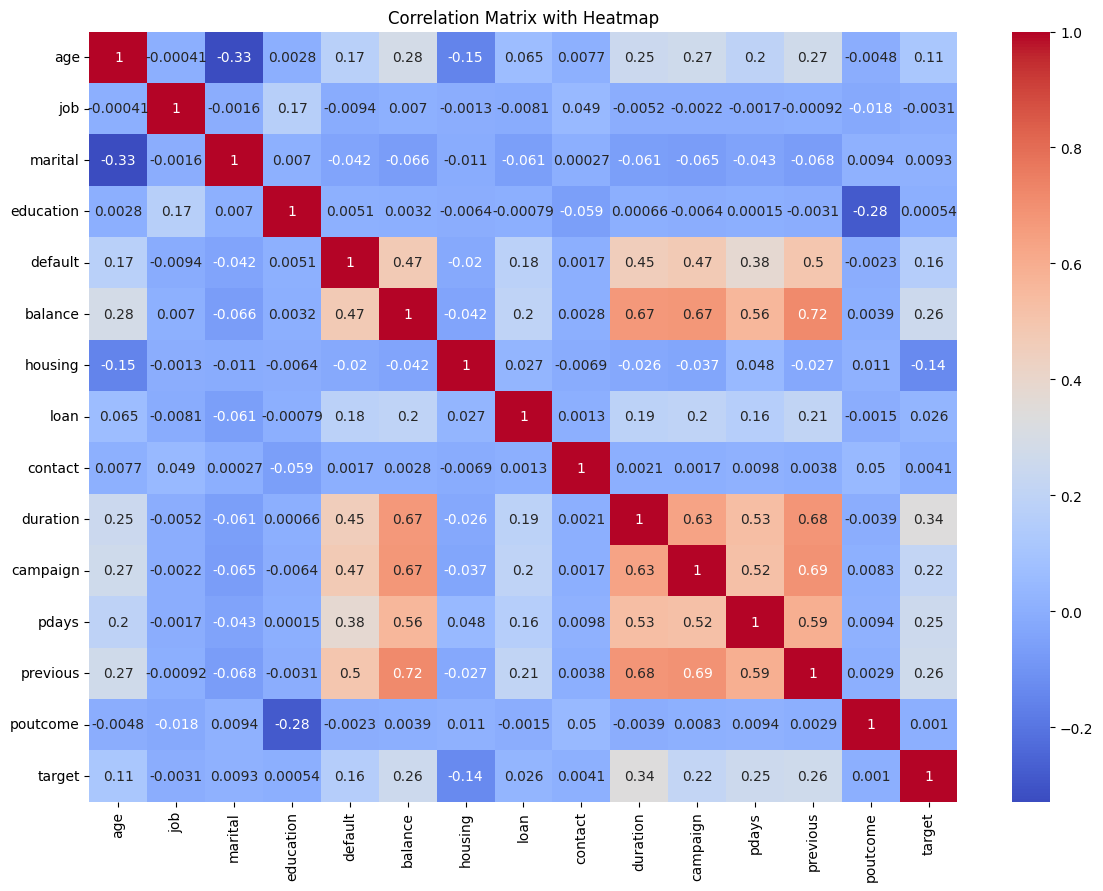

In [142]:
# Correlation heatmap
print("\n")
Xy_train = pd.concat([X_train, Y_train], axis=1)
plt.figure(figsize=(14, 10))
sns.heatmap(Xy_train.corr(),cmap='coolwarm',annot=True)
plt.title('Correlation Matrix with Heatmap')
plt.show()

**The columns balance , campaign, duration,pdays are correlated more amongst them** <br>
**The duration and balance has slight positive correlation with the target**

<h3>MILESTONE 2 -Linear Models , SGD, hyperparameter tuning and Cross validation</h3>

<h4>class balancing</h4>

In [143]:
ros=RandomOverSampler()
X_train,Y_train = ros.fit_resample(X_train,Y_train)
dictxy={}

<h4>Hyper parameter tuning setup</h4>

In [144]:
sgd = SGDClassifier(loss='hinge', penalty='elasticnet', fit_intercept=True, max_iter=10000, tol=0.001, shuffle=True, n_jobs=None, random_state=76, learning_rate='constant',
                                   early_stopping=True, validation_fraction =0.2, warm_start=False)

Pp = Perceptron(penalty=None, max_iter=1000, tol=0.001, shuffle=True, n_jobs=None, random_state=42, early_stopping=True, validation_fraction=0.1, n_iter_no_change=5,warm_start=False)

LR = LogisticRegression(penalty='l1', dual=False, tol=0.001, fit_intercept=True, random_state=42, solver='saga', max_iter=10000, warm_start=False, n_jobs=None)

paramsgd={
    "eta0": [0.0001,0.001,0.01,0.1],
    "alpha":[0.001,0.01,0.1,],
    "l1_ratio":[0,0.15,0.3,0.4,0.6,1]
}
parampp={
    "eta0": [0.001,0.01,0.1,1]
}
paramlr={
    "C":[0.001,0.01,0.1,1.0,10]
}

<h4>Hyper Param Tuning for Perceptron</h4>

In [145]:
print('HYPER PARAM TUNING FOR Perceptron\n')
grid_search_Pp = GridSearchCV(Pp, parampp , cv=5, scoring ='f1_macro', return_train_score=True) # internally by default uses stratifiedkfold else we can state an object of cv stated above
grid_search_Pp.fit(X_train, Y_train)  #(X,y)
print('best param : ',grid_search_Pp.best_params_)
y_predpp = grid_search_Pp.best_estimator_.predict(X_test) # this best_estimator is the actual estimator object and hence we can get its attributes too
print('\nscore of X_test using best param : ' , f1_score(Y_test,y_predpp,average='macro'))
fn=f1_score(Y_test,y_predpp,average='macro')
dictxy['Perceptron']=fn
print(classification_report(Y_test,y_predpp))

HYPER PARAM TUNING FOR Perceptron

best param :  {'eta0': 0.001}

score of X_test using best param :  0.34490929744434295
              precision    recall  f1-score   support

         0.0       0.92      0.25      0.40      6643
         1.0       0.18      0.89      0.29      1200

    accuracy                           0.35      7843
   macro avg       0.55      0.57      0.34      7843
weighted avg       0.81      0.35      0.38      7843



<h4>Hyper Param Tuning for logistic regression</h4>

HYPER PARAM TUNING FOR Logistic Regression

best param :  {'C': 0.1}

score of X_test using best param :  0.7109049459320576

CV results

0.7206131573021135 {'C': 0.001}
0.7558840543521708 {'C': 0.01}
0.7576672391585548 {'C': 0.1}
0.7572801965316384 {'C': 1.0}
0.7572437111277178 {'C': 10}


              precision    recall  f1-score   support

         0.0       0.94      0.84      0.89      6643
         1.0       0.44      0.68      0.53      1200

    accuracy                           0.82      7843
   macro avg       0.69      0.76      0.71      7843
weighted avg       0.86      0.82      0.83      7843



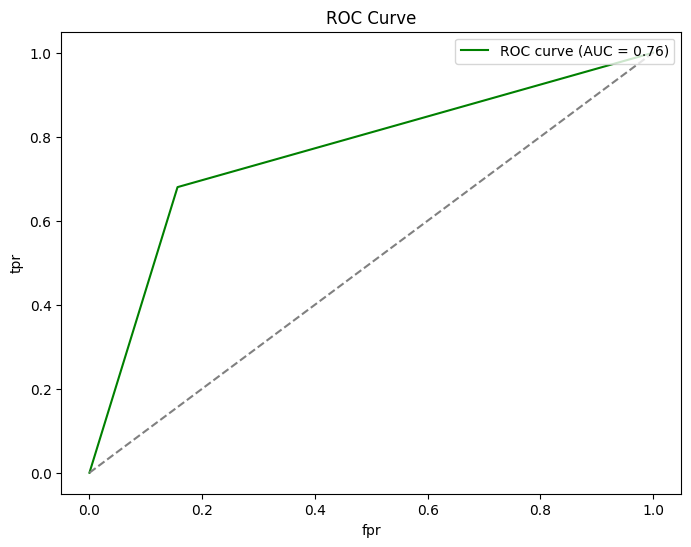

In [146]:
print('HYPER PARAM TUNING FOR Logistic Regression\n')
grid_search_Lr = GridSearchCV(LR, paramlr , cv=5, scoring ='f1_macro', return_train_score=True) # internally by default uses stratifiedkfold else we can state an object of cv stated above
grid_search_Lr.fit(X_train, Y_train)  #(X,y)
print('best param : ' , grid_search_Lr.best_params_)
y_predlr = grid_search_Lr.best_estimator_.predict(X_test) # this best_estimator is the actual estimator object and hence we can get its attributes too
print('\nscore of X_test using best param : ' , f1_score(Y_test,y_predlr,average='macro'))
fn=f1_score(Y_test,y_predlr,average='macro')
dictxy['logistic'] = fn
cv_res = grid_search_Lr.cv_results_
print('\nCV results\n')
for means, params in zip(cv_res['mean_test_score'],cv_res['params']): #to combine 2/more iterables used zip
  #for each param mean cv score across all cv-s
  print(means,params) #scores
print('\n')
print(classification_report(Y_test,y_predlr))
fpr, tpr, thresholds = roc_curve(Y_test,y_predlr)
auc = roc_auc_score(Y_test,y_predlr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='green', label=f'ROC curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  
plt.ylabel('tpr')
plt.xlabel('fpr')
plt.title('ROC Curve')
plt.legend(loc='upper right')
plt.show()

<h4>Ridge Classification with cross validation</h4>

Ridge Classifier CV

CV results :  [[[-0.07076004 -0.07076116 -0.07077236 -0.07088429 -0.07199477]]

 [[-0.02564737 -0.02564839 -0.02565858 -0.02576032 -0.02676853]]

 [[-0.53346332 -0.53346173 -0.53344593 -0.53328799 -0.53171709]]

 ...

 [[ 0.07869011  0.07868906  0.07867858  0.07857383  0.0775337 ]]

 [[ 0.8436756   0.84367495  0.84366845  0.84360365  0.84297116]]

 [[ 0.48142046  0.4814207   0.48142313  0.48144756  0.48170652]]]

score of X_test :  0.6846519675147388
              precision    recall  f1-score   support

         0.0       0.93      0.83      0.88      6643
         1.0       0.40      0.64      0.49      1200

    accuracy                           0.80      7843
   macro avg       0.66      0.73      0.68      7843
weighted avg       0.85      0.80      0.82      7843



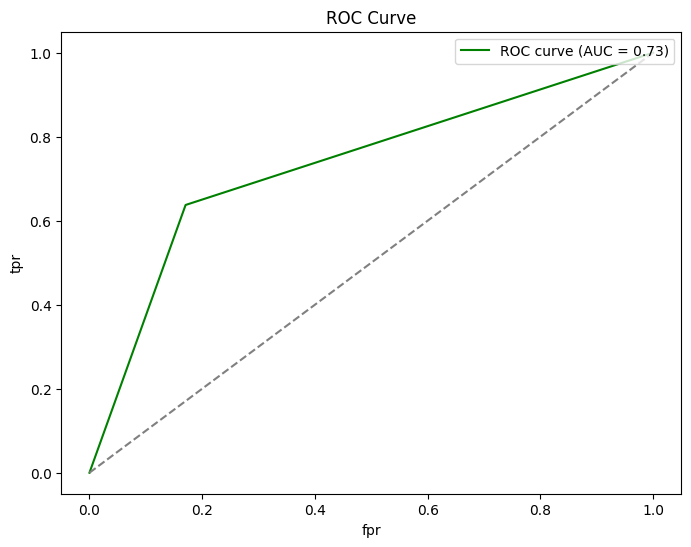

In [147]:
print('Ridge Classifier CV\n')
RCV = RidgeClassifierCV(alphas=(0.01,0.1, 1.0, 10.0,100),fit_intercept=True, scoring='f1_macro', cv=None, store_cv_values=True)
RCV.fit(X_train,Y_train)
print('CV results : ',RCV.cv_values_)
y_predrcv=RCV.predict(X_test)
print('\nscore of X_test : ',f1_score(Y_test,y_predrcv,average='macro'))
fn=f1_score(Y_test,y_predrcv,average='macro')
dictxy['RidgeCv']=fn
print(classification_report(Y_test,y_predrcv))
fpr, tpr, thresholds = roc_curve(Y_test,y_predrcv)
auc = roc_auc_score(Y_test,y_predrcv)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='green', label=f'ROC curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  
plt.ylabel('tpr')
plt.xlabel('fpr')
plt.title('ROC Curve')
plt.legend(loc='upper right')
plt.show()

<h4>Hyper Param Tuning for SGD classifier</h4>

HYPER PARAM TUNING FOR SGD

best param :  {'alpha': 0.001, 'eta0': 0.001, 'l1_ratio': 0.15}

score of X_test using best param :  0.7214910699262038

score of X_train using best param :  0.7753282192644024
[[ 0.05216312  0.          0.19847319  0.00774877 -0.2105305   0.01391677
  -0.81387835 -0.47023175  0.09749885  1.55779425 -0.31916731  0.3876536
   0.08132334  0.03407884]]
              precision    recall  f1-score   support

         0.0       0.95      0.83      0.89      6643
         1.0       0.44      0.75      0.56      1200

    accuracy                           0.82      7843
   macro avg       0.70      0.79      0.72      7843
weighted avg       0.87      0.82      0.84      7843



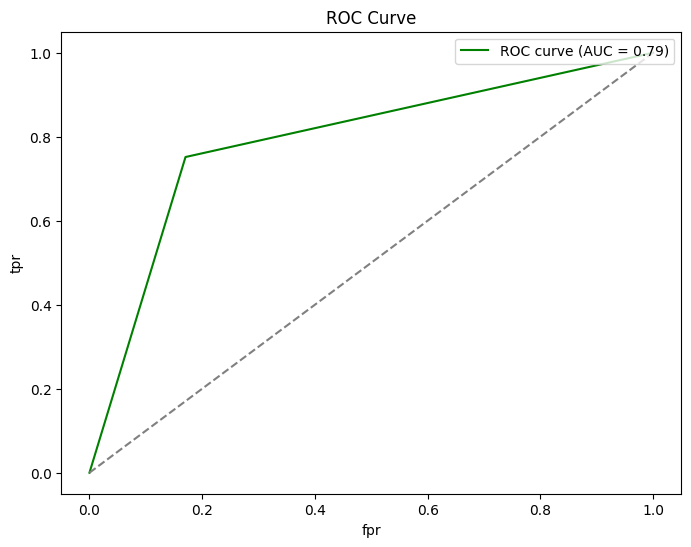

In [148]:
print('HYPER PARAM TUNING FOR SGD\n')
grid_search_sgd = GridSearchCV(sgd, paramsgd , cv=5, scoring ='f1_macro', return_train_score=True) # internally by default uses stratifiedkfold else we can state an object of cv stated above
grid_search_sgd.fit(X_train, Y_train)  #(X,y)
print('best param : ',grid_search_sgd.best_params_)
y_predsgd = grid_search_sgd.best_estimator_.predict(X_test) # this best_estimator is the actual estimator object and hence we can get its attributes too

print('\nscore of X_test using best param : ' , f1_score(Y_test,y_predsgd,average='macro'))
y_h = grid_search_sgd.best_estimator_.predict(X_train) # this best_estimator is the actual estimator object and hence we can get its attributes too

print('\nscore of X_train using best param : ' , f1_score(Y_train,y_h,average='macro'))
fn=f1_score(Y_test,y_predsgd ,average='macro')
dictxy['SGD']=fn
print( grid_search_sgd.best_estimator_.coef_)
SGD=grid_search_sgd.best_estimator_
print(classification_report(Y_test,y_predsgd ))
fpr, tpr, thresholds = roc_curve(Y_test,y_predsgd )
auc = roc_auc_score(Y_test,y_predsgd )
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='green', label=f'ROC curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  
plt.ylabel('tpr')
plt.xlabel('fpr')
plt.title('ROC Curve')
plt.legend(loc='upper right')
plt.show()

<h3>Milestone 3 -Feature Selection ,KNN,Naive Bayes,SVM models</h3>

In [149]:
from sklearn.feature_selection import VarianceThreshold, f_classif, SelectPercentile,RFECV

Var=VarianceThreshold(threshold = 0.5)
Var.fit_transform(X_train_copy)
coll=Var.get_feature_names_out()
print('features through Variance : ',coll)

X_train_copy_selectpercentile=X_train.copy(deep=True)
X_test_copy_selectpercentile=X_test.copy(deep=True)

selector = SelectPercentile(f_classif, percentile=60)
X_train_selectP = pd.DataFrame(selector.fit_transform(X_train_copy_selectpercentile, Y_train))
cols=X_train_copy_selectpercentile.columns[selector.get_support()]
X_train_selectP.columns = cols
c=list(cols)
X_test_selectP=X_test_copy_selectpercentile[c]
print(X_test_selectP.head())
rfecv = RFECV(estimator=SGD, step=1, cv=3)  
sel = rfecv.fit(X_train, Y_train)
selected_features = sel.support_ 
print("Features selected: ", selected_features)
X_train_selected = X_train.iloc[:, selected_features]
X_test_selected = X_test.iloc[:, selected_features]

features through Variance :  ['age' 'job' 'balance' 'duration' 'campaign' 'pdays' 'previous']
            age  default   balance  housing  duration  campaign     pdays  \
29864 -1.662017      0.0 -0.196923      0.0 -0.368878 -0.116706  0.157322   
14029  0.536778      0.0 -0.290019      1.0 -0.532580  0.083794  1.702475   
12694 -0.955261      0.0 -0.330401      0.0 -0.499066 -0.317205 -0.457017   
31409 -0.248506      0.0 -0.156179      0.0 -0.121392 -0.317205 -0.457017   
24313 -0.719676      0.0 -0.248610      1.0 -0.559648 -0.417455  1.119164   

       previous  
29864 -0.225423  
14029 -0.180573  
12694 -0.270274  
31409 -0.270274  
24313 -0.158148  
Features selected:  [False False  True False  True False  True  True False  True  True  True
  True False]


In [150]:
knn= KNeighborsClassifier(n_neighbors=20, weights='uniform', algorithm='brute', p=2, metric='minkowski', n_jobs=None)
knn.fit(X_train_selected,Y_train)
y_pred=knn.predict(X_test_selected)
score=f1_score(Y_test,y_pred,average='macro')
dictxy['KNN'] = score
print('KNN score for 5 neighbours : ',score)
print(classification_report(Y_test,y_pred ))

KNN score for 5 neighbours :  0.7102254830818604
              precision    recall  f1-score   support

         0.0       0.96      0.80      0.87      6643
         1.0       0.42      0.80      0.55      1200

    accuracy                           0.80      7843
   macro avg       0.69      0.80      0.71      7843
weighted avg       0.87      0.80      0.82      7843



In [151]:
svm = SVC(C=10, kernel='rbf', gamma=0.1)
svm.fit(X_train_selected,Y_train)
ypred=svm.predict(X_test_selected)
#print('The kernal SVM Dual Coefficients : ',svm.dual_coef_ ) # since kernal w not calculated so instead of coeff_ we got the coefs to be multiplied hence dual_coef
#print('\n The Support Vecorts\n',svm.support_vectors_)      #(n_SV, n_features) -- Support vectors.
score=f1_score(Y_test,ypred,average='macro')
dictxy['SVM(rbf kernal)']=score
print('\n Validation score : ',score)
print(classification_report(Y_test,ypred))


 Validation score :  0.7142547387798451
              precision    recall  f1-score   support

         0.0       0.96      0.80      0.87      6643
         1.0       0.42      0.82      0.56      1200

    accuracy                           0.80      7843
   macro avg       0.69      0.81      0.71      7843
weighted avg       0.88      0.80      0.82      7843



Linear Support Vector Machine decision function :  [[ 0.06606583 -0.08101048 -0.41045679 -0.2002228   0.35123709 -0.08457801
   0.15051168  0.02996854]]

 Validation score :  0.6925296175233021
              precision    recall  f1-score   support

         0.0       0.93      0.83      0.88      6643
         1.0       0.41      0.65      0.51      1200

    accuracy                           0.81      7843
   macro avg       0.67      0.74      0.69      7843
weighted avg       0.85      0.81      0.82      7843



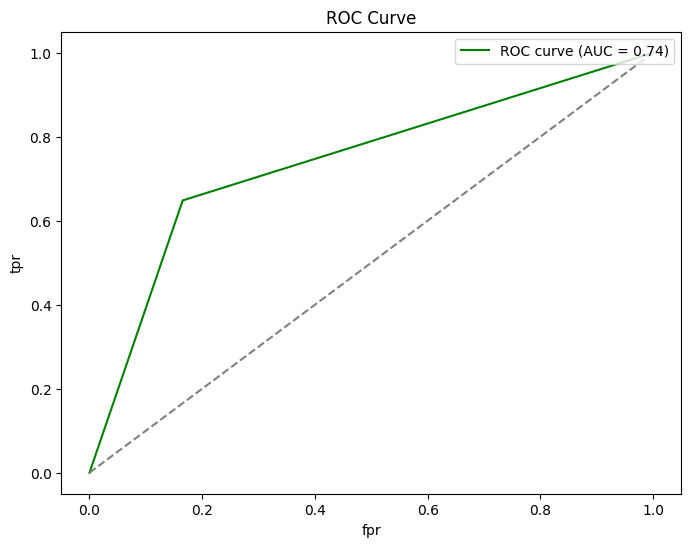

In [152]:
lsvc =LinearSVC(penalty='l2', loss='squared_hinge', tol=0.0001, C=0.01, random_state=42, max_iter=1000)
#dual --> linear kernal when n_samples < n_features
lsvc.fit(X_train_selected,Y_train)
ypred=lsvc.predict(X_test_selected)
print('Linear Support Vector Machine decision function : ', lsvc.coef_) # the w or decision function
score=f1_score(Y_test,ypred,average='macro')
dictxy['Linear SVM']=score
print('\n Validation score : ',score)
print(classification_report(Y_test,ypred))
fpr, tpr, thresholds = roc_curve(Y_test,ypred)
auc = roc_auc_score(Y_test,ypred)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='green', label=f'ROC curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  
plt.ylabel('tpr')
plt.xlabel('fpr')
plt.title('ROC Curve')
plt.legend(loc='upper right')
plt.show()

In [153]:
gnb = GaussianNB()
gnb.fit(X_train_selected,Y_train)
ypred=gnb.predict(X_test_selected)
score=f1_score(Y_test,ypred,average='macro')
dictxy['Naive Bayes']=score
print('Validation score : ',score)
print(classification_report(Y_test,ypred))

Validation score :  0.6288451905627422
              precision    recall  f1-score   support

         0.0       0.88      0.94      0.91      6643
         1.0       0.46      0.28      0.35      1200

    accuracy                           0.84      7843
   macro avg       0.67      0.61      0.63      7843
weighted avg       0.81      0.84      0.82      7843



<h3>Milestone 4 -Ensemble and Multilayer perceptron </h3>

In [154]:
d = DecisionTreeClassifier(criterion='entropy', random_state=89, max_depth=11)
d.fit(X_train,Y_train)
ypred=d.predict(X_test)
score=f1_score(Y_test,ypred,average='macro')
dictxy['Decission Tree']=score
print('dt Validation score : ',score)
print(classification_report(Y_test,ypred))

dt Validation score :  0.7226457675522531
              precision    recall  f1-score   support

         0.0       0.95      0.82      0.88      6643
         1.0       0.44      0.78      0.56      1200

    accuracy                           0.82      7843
   macro avg       0.70      0.80      0.72      7843
weighted avg       0.87      0.82      0.83      7843



In [155]:
bag = BaggingClassifier(estimator=d , n_estimators=260, max_samples=0.8, max_features=0.5, bootstrap=True, bootstrap_features=True, oob_score=True, warm_start=False, random_state=99)
bag.fit(X_train,Y_train)
print('Bagging oob score : ',bag.oob_score_)
ypred=bag.predict(X_test)
score=f1_score(Y_test,ypred,average='macro')
dictxy['Bagging']=score
print('Bagging validation score : ', score)
print('\n')
print(classification_report(Y_test,ypred))

Bagging oob score :  0.8608129838076363
Bagging validation score :  0.7616395179645354


              precision    recall  f1-score   support

         0.0       0.95      0.88      0.91      6643
         1.0       0.52      0.74      0.61      1200

    accuracy                           0.86      7843
   macro avg       0.74      0.81      0.76      7843
weighted avg       0.88      0.86      0.87      7843



In [156]:
print(X_test.columns)

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'duration', 'campaign', 'pdays', 'previous',
       'poutcome'],
      dtype='object')


In [157]:
DT = DecisionTreeClassifier(criterion='entropy', splitter='best',random_state=42,max_depth=5, min_samples_split=2,
                            min_samples_leaf=2, max_features='sqrt', max_leaf_nodes=5 )

ada = AdaBoostClassifier(estimator=DT, n_estimators=50, learning_rate=1.0, algorithm='SAMME', random_state=42)
ada.fit(X_train,Y_train)
print('Adaboost Feature importances : ',ada.feature_importances_)
ypred=ada.predict(X_test)
score=f1_score(Y_test,ypred,average='macro')
dictxy['AdaBoost']=score
print('Adaboost validation score : ',score)
print(classification_report(Y_test,ypred))

Adaboost Feature importances :  [0.08293398 0.00301077 0.02294014 0.00146358 0.00763915 0.06099455
 0.05859517 0.04089838 0.         0.52573586 0.05196732 0.08580353
 0.05581935 0.00219823]
Adaboost validation score :  0.7232142857142858
              precision    recall  f1-score   support

         0.0       0.97      0.80      0.88      6643
         1.0       0.43      0.84      0.57      1200

    accuracy                           0.81      7843
   macro avg       0.70      0.82      0.72      7843
weighted avg       0.88      0.81      0.83      7843



In [158]:
from xgboost import XGBClassifier
xgb=XGBClassifier(objective='binary:logistic',learning_rate=0.1,max_depth=10,n_estimators=100)
xgb.fit(X_train,Y_train)
ypred=xgb.predict(X_test)
score=f1_score(Y_test,ypred,average='macro')
dictxy['XGBoost']=score
print(score)
print(classification_report(Y_test,ypred))

0.742776517286623
              precision    recall  f1-score   support

         0.0       0.95      0.85      0.90      6643
         1.0       0.48      0.75      0.59      1200

    accuracy                           0.84      7843
   macro avg       0.72      0.80      0.74      7843
weighted avg       0.88      0.84      0.85      7843



In [159]:
mlp = MLPClassifier(hidden_layer_sizes=(100,4), activation='relu', solver='adam', alpha=0.0001, batch_size='auto',
                                     learning_rate='constant', learning_rate_init=0.001, power_t=0.5, max_iter=1000, shuffle=True, random_state=None, tol=0.0001, verbose=False,
                                     warm_start=False, momentum=0.9, nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1, beta_1=0.9,
                                     beta_2=0.999, epsilon=1e-08, n_iter_no_change=10, max_fun=15000)
mlp.fit(X_train,Y_train)
##############
ypred=mlp.predict(X_test)
score=f1_score(Y_test,ypred,average='macro')
dictxy['MLP']=score
print(score)
print(classification_report(Y_test,ypred))

0.7213935519278716
              precision    recall  f1-score   support

         0.0       0.96      0.80      0.88      6643
         1.0       0.43      0.82      0.57      1200

    accuracy                           0.81      7843
   macro avg       0.70      0.81      0.72      7843
weighted avg       0.88      0.81      0.83      7843



<h3>Comparing all the models</h3>

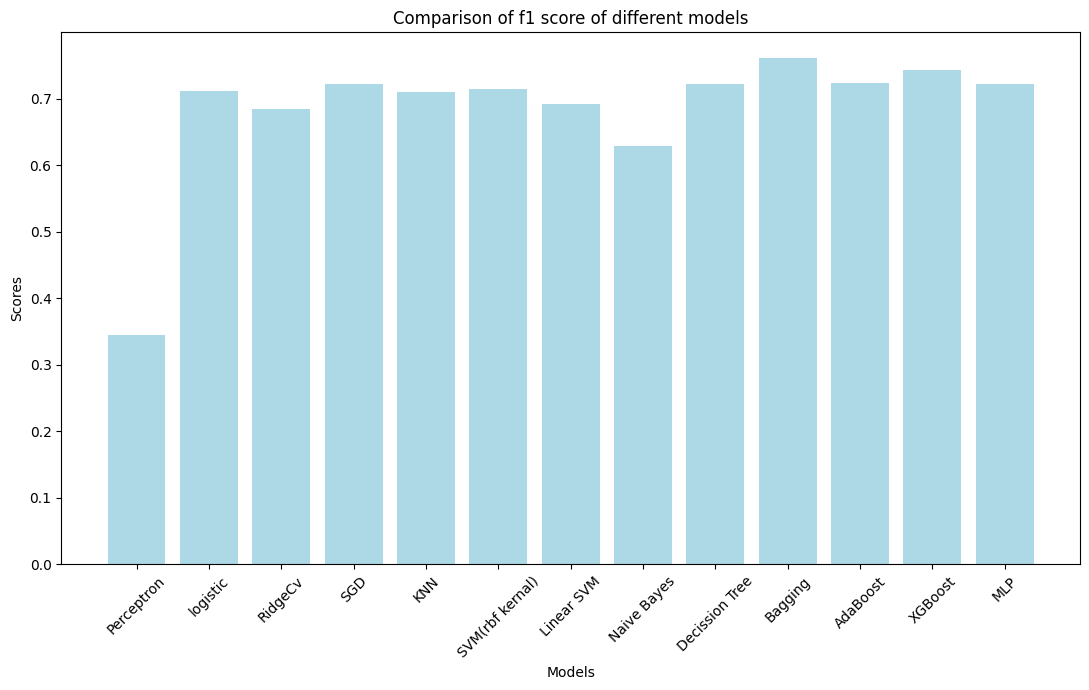

In [165]:
plt.figure(figsize=(11, 7)) 
plt.bar(dictxy.keys(), dictxy.values(), color='lightblue')
plt.xticks(rotation=45)  
plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Comparison of f1 score of different models')
plt.tight_layout()  
plt.show()

<h4>for TEST data making submission using till now best model bagging classifier</h4>

In [ ]:
ytest=bag.predict(test)

In [ ]:
submission=pd.DataFrame({"id":range(0,test.shape[0]),"target": ytest})

In [ ]:
submission.replace({'target':{0:'no',1:'yes'}},inplace=True)

In [ ]:
submission.to_csv('submission.csv',index=False)